In [72]:
from 工具 import *
import matplotlib.pyplot as plt;import matplotlib.font_manager
碼表 = pd.read_excel('碼表-騰訊.xlsx', '正表')

/media/yyr/DATA/anaconda3/envs/迩原/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12285 (\u2ffd) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


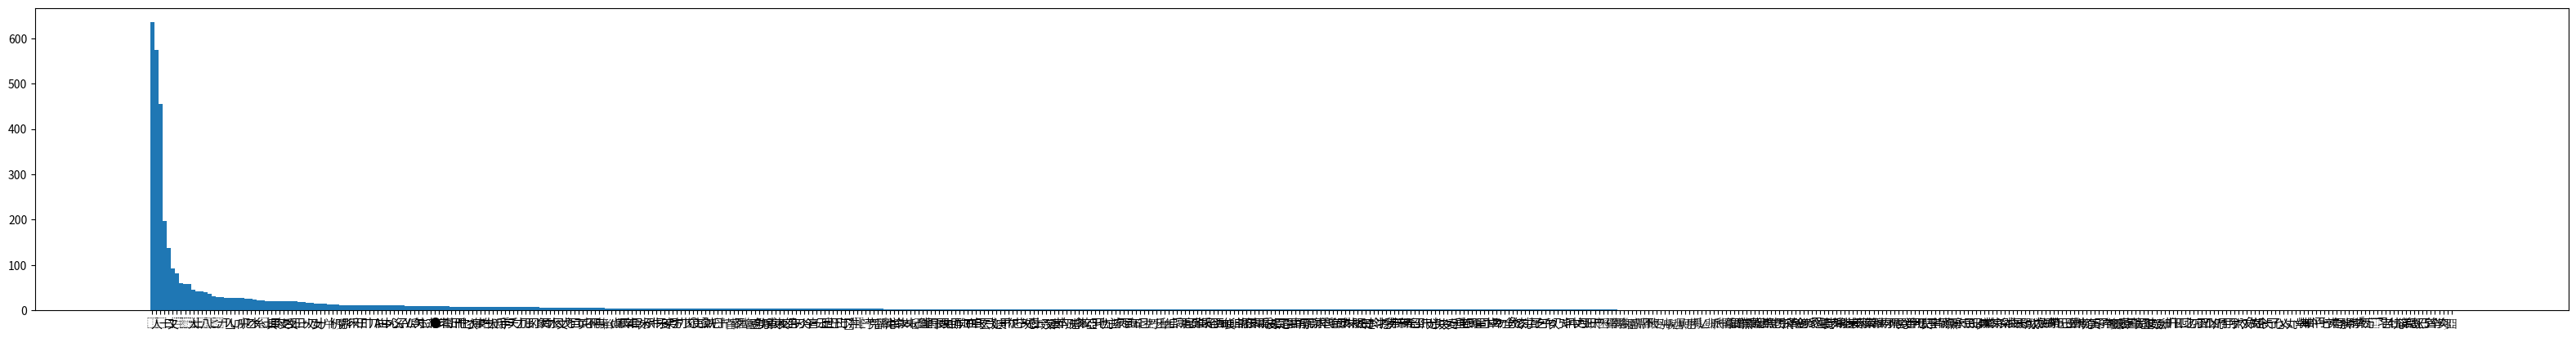

In [73]:
# 統計
plt.rcParams["font.family"] = "Noto Sans CJK JP", "KaiXinSongB"
# 式 = '⿳⿳⿰甲乙丙丁戊己';檢構字式(式)
碼表.fillna('',inplace=True)
所有構件 = 碼表['迩原正解'].str.cat(sep='') + 碼表['迩原或解'].astype(str).str.cat(sep='') + 碼表['迩原別解'].astype(str).str.cat(sep='') + 碼表['迩原又解'].astype(str).str.cat(sep='')
計 = Counter(所有構件)
plt.figure(dpi=100).set_figwidth(40)
plt.bar(*zip(*計.most_common()), width=1)
plt.show()
# plt.figure().get_dpi()
# 系統字型列 = matplotlib.font_manager.findSystemFonts(fontpaths=None)# https://matplotlib.org/stable/api/font_manager_api.html
# 字型列 = matplotlib.font_manager.get_font_names()
# matplotlib.font_manager.FontProperties('YeMing').get_name()
# print(系統字型列)

In [74]:
碼表排序 = 碼表.sort_values(by='漢字', axis=0)
碼表排序["文或字"] = 碼表排序["漢字"].apply(lambda z: ord(z))
碼表排序.loc[碼表排序["漢字"]==碼表排序["迩原正解"], "文或字"] = 0
碼表排序 = 碼表排序.sort_values(by=['漢字'], axis=0, key=攏)
# 碼表排序 = 碼表排序.sort_values(by=['迩原正解'], axis=0, key=依構件排序)
碼表排序 = 碼表排序.sort_values(by='文或字', axis=0)
# 碼表排序 = 碼表排序.sort_values(by=['備註'], axis=0, key=依備註排序)
碼表排序.drop(columns=['Unnamed: 0','文或字'], inplace=True)
碼表排序

,unicode,漢字,迩原正解,迩原或解,迩原別解,迩原又解,字通解字,六書,說文整理番號,備註,表頭意義參見：http://kanji-database.sourceforge.net/ids/ids-analysis.html,Unnamed: 12,Unnamed: 13
1,U+2C3BF,𬎿,𬎿,,,,,,,,,,
361,U+572D,圭,圭,,,,圭,象形,4801300,,,,
360,U+5782,垂,垂,,,,→𡍮,,4801290,,,,
359,U+5807,堇,堇,,,,→𦻍,,4820010,,,,
358,U+58EB,士,士,,,,士,象形,0090010,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74602,U+2B819,𫠙,,,,,,,,,,,
74603,U+2B81A,𫠚,,,,,,,,,,,
74604,U+2B81B,𫠛,,,,,,,,,,,
74605,U+2B81C,𫠜,,,,,→齯,簡体,,,,,


In [75]:
碼表排序.to_excel('碼表.xlsx', '正表', freeze_panes=(1,0))